In [160]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')

## Loading data

In [161]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
data = pd.read_csv("/content/drive/MyDrive/Ironhack/data_def.csv",encoding= 'unicode_escape')
data


,Unnamed: 0,date,site,temp_(Â°c)
0,0,2013-05-10,Parcel da Pombinha,22.895027
1,1,2013-05-11,Parcel da Pombinha,22.874889
2,2,2013-05-12,Parcel da Pombinha,22.910667
3,3,2013-05-13,Parcel da Pombinha,22.901333
4,4,2013-05-14,Parcel da Pombinha,22.890667
...,...,...,...,...
579,579,2014-12-10,Parcel da Pombinha,18.152167
580,580,2014-12-11,Parcel da Pombinha,17.803542
581,581,2014-12-12,Parcel da Pombinha,17.748125
582,582,2014-12-13,Parcel da Pombinha,17.664972


In [163]:
import datetime

In [164]:
from datetime import date, timedelta
sdate = date(2014,12,15)   # start date
edate = date(2015,1,14)   # end date

# FACEBOOK’S PROPHET model

In [128]:
#!pip install pystan


In [166]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [168]:
from fbprophet import Prophet

In [169]:
data_fb = data_def[['date', 'temp_(°c)']] 
data_fb.head()


,date,temp_(°c)
0,2013-05-10,22.895027
1,2013-05-11,22.874889
2,2013-05-12,22.910667
3,2013-05-13,22.901333
4,2013-05-14,22.890667


In [170]:
data_fb.columns = ['ds', 'y']
data_fb.head()

,ds,y
0,2013-05-10,22.895027
1,2013-05-11,22.874889
2,2013-05-12,22.910667
3,2013-05-13,22.901333
4,2013-05-14,22.890667


In [171]:
train_size = int(0.85 * len(data_fb))



In [172]:
test_size = len(data_fb) - train_size
train = data_fb.iloc[:train_size, :]
test = data_fb.iloc[train_size:,:]

In [173]:
x_train, y_train = pd.DataFrame(data_fb.iloc[:train_size, 0]), pd.DataFrame(data_fb.iloc[:train_size, 1])
x_test, y_test = pd.DataFrame(data_fb.iloc[train_size:, 0]), pd.DataFrame(data_fb.iloc[train_size:, 1])

In [174]:
print(len(train), len(x_test), len(x_train), len(y_train), len(data_fb))

496 88 496 496 584


In [137]:
# define the model
model = Prophet(yearly_seasonality=True,weekly_seasonality=False,changepoint_range=1, changepoint_prior_scale=0.85)
# fit the model
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [153]:
y_pred = model.predict(x_test)

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

score_mae = mean_absolute_error(y_test, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred.tail(test_size)['yhat']))

print( 'RMSE: {}'.format(score_rmse))

RMSE: 1.5163804965349845


In [154]:
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-18,22.137596,18.943038,21.312959,22.137596,22.137596,-1.978321,-1.978321,-1.978321,-1.978321,-1.978321,-1.978321,0.0,0.0,0.0,20.159275
1,2014-09-19,22.174046,19.112417,21.364599,22.174046,22.174046,-1.943933,-1.943933,-1.943933,-1.943933,-1.943933,-1.943933,0.0,0.0,0.0,20.230113
2,2014-09-20,22.210495,19.085048,21.454321,22.210495,22.210495,-1.914588,-1.914588,-1.914588,-1.914588,-1.914588,-1.914588,0.0,0.0,0.0,20.295907
3,2014-09-21,22.246945,19.188112,21.611080,22.246945,22.246945,-1.890983,-1.890983,-1.890983,-1.890983,-1.890983,-1.890983,0.0,0.0,0.0,20.355962
4,2014-09-22,22.283395,19.248277,21.530792,22.277603,22.287573,-1.873701,-1.873701,-1.873701,-1.873701,-1.873701,-1.873701,0.0,0.0,0.0,20.409694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2014-12-10,25.162918,16.870475,26.358052,20.421781,29.744970,-3.549265,-3.549265,-3.549265,-3.549265,-3.549265,-3.549265,0.0,0.0,0.0,21.613653
84,2014-12-11,25.199367,16.942632,26.515714,20.389311,29.878607,-3.531297,-3.531297,-3.531297,-3.531297,-3.531297,-3.531297,0.0,0.0,0.0,21.668071
85,2014-12-12,25.235817,16.683948,26.578062,20.299774,30.065678,-3.511695,-3.511695,-3.511695,-3.511695,-3.511695,-3.511695,0.0,0.0,0.0,21.724122
86,2014-12-13,25.272267,16.824393,26.798108,20.196019,30.175957,-3.491542,-3.491542,-3.491542,-3.491542,-3.491542,-3.491542,0.0,0.0,0.0,21.780725


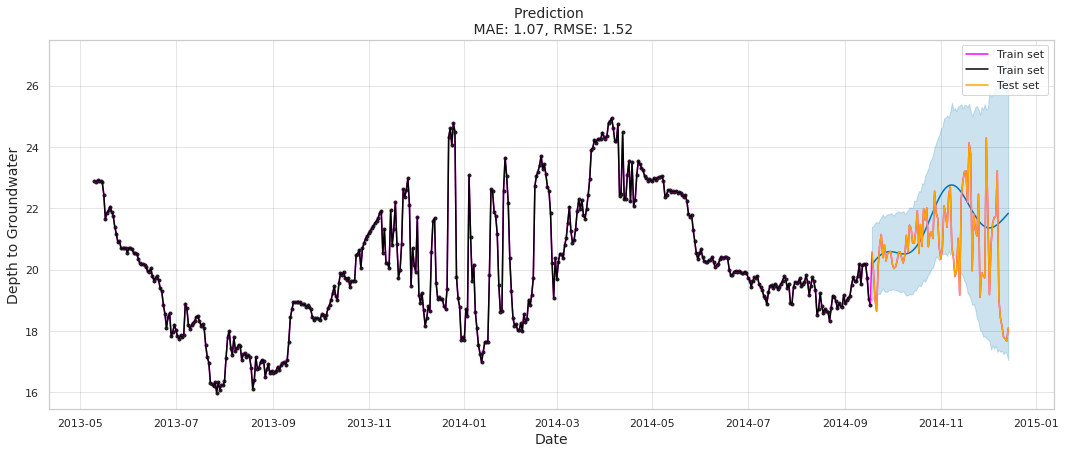

In [141]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=data_fb['ds'],y=data_fb['y'], ax=ax, color = "magenta", label="Train set")
sns.lineplot(x=x_train['ds'],y=y_train['y'], ax=ax, color = "black", label="Train set")
sns.lineplot(x=x_test['ds'], y=y_test['y'], ax=ax, color='orange', label='Test set') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

In [142]:
future = list()
for i in range(1):
    date = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
    future.append(date)
    
future = pd.DataFrame(future).T
future
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future.head()

,ds
0,2014-12-15
1,2014-12-16
2,2014-12-17
3,2014-12-18
4,2014-12-19


In [143]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

          ds       yhat  yhat_lower  yhat_upper
0 2014-12-15  21.891445   16.997716   26.883240
1 2014-12-16  21.943631   16.635133   27.128909
2 2014-12-17  21.992535   16.528601   27.425096
3 2014-12-18  22.037394   16.485164   27.372180
4 2014-12-19  22.077541   16.493732   27.495863


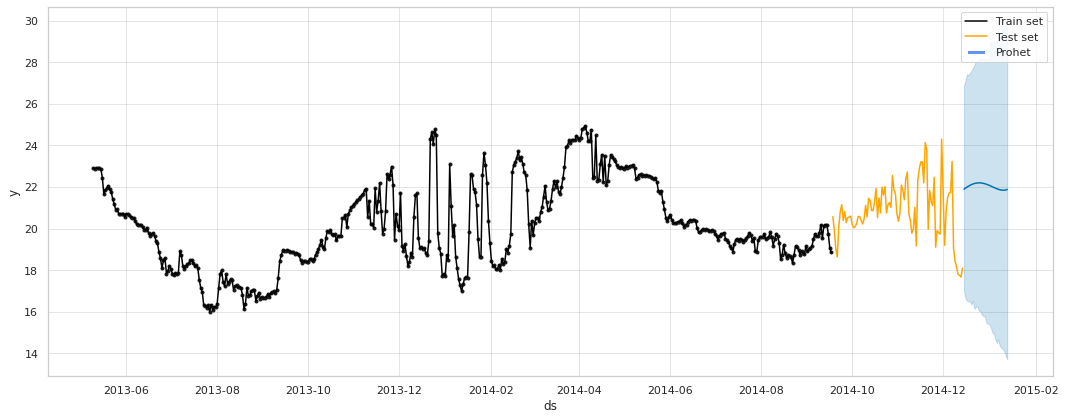

In [144]:
import matplotlib.pyplot 
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Patch(facecolor='cornflowerblue', edgecolor='w',linewidth=5))
    labels.append("Prohet")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

# plot forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(forecast, ax=ax)
sns.lineplot(x=x_train['ds'],y=y_train['y'], ax=ax, color = "black", label="Train set")
sns.lineplot(x=x_test['ds'], y=y_test['y'], ax=ax, color='orange', label='Test set') #navajowhite
lgd = ax.legend()
add_patch(lgd)
#ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#ax.set_xlabel(xlabel='Date', fontsize=14)
#ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()
###############
#model.plot(forecast)
#pyplot.show()